<a href="https://colab.research.google.com/github/JahongirFozilovich/Data-Science-practice/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vazifa

Quyidagi ma'lumotlar to'plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishdir.


Tarkib

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.





Ustunlar





Pregnancies: homilador bo'lish soni



Glucose: glyukozaga test natijasi



BloodPressure: diastolik qon bosimi (mm Hg)



SkinThickness: Triceps teri burmasining qalinligi (mm)



Insulin: 2 soatlik sarum insulini (mu U/ml)



BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)



DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi



Age: Yosh (yil)



Outcome: Class (0 - diabet yo'q, 1 - diabet)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [3]:
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/refs/heads/main/diabetes.csv"
df = pd.read_csv(url)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [5]:
df.shape

(768, 9)

In [6]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.corrwith(df.Outcome).abs().sort_values(ascending=False)

,0
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [8]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [9]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [38]:
y_predict = knn.predict(X_test_scaled)

In [39]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.4794520547945205)

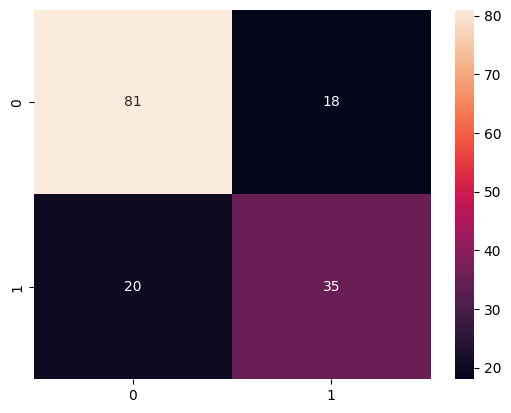

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.660377358490566
recall=0.6363636363636364
f1=0.6481481481481481
accuracy=0.7532467532467533


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [18]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       500
           1       0.62      0.53      0.57       268

    accuracy                           0.72       768
   macro avg       0.69      0.68      0.68       768
weighted avg       0.72      0.72      0.72       768



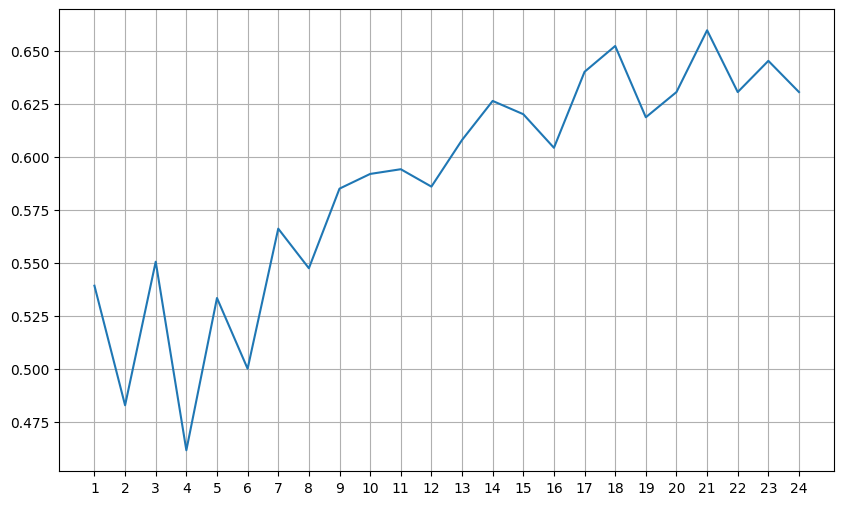

In [19]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()